In [187]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(555)


In [188]:
# load data
df = pd.read_csv("marketing_campaign.csv")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [189]:
# look for information about the dataset
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [190]:
# drop missing values
df3 = df.dropna()
df3

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2216 rows x 29 columns]

In [191]:
# grouping by ID column to see if there's any overlapping customers in the dataset 
df2 = df3.select_dtypes(include=np.number).groupby("ID").sum().sort_values("Income", ascending=False)
df2

Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID                                                                             
9432         1977  666666.0        1         0       23         9         14   
1503         1976  162397.0        1         1       31        85          1   
1501         1982  160803.0        0         0       21        55         16   
5336         1971  157733.0        1         0       37        39          1   
8475         1973  157243.0        0         1       98        20          2   
...           ...       ...      ...       ...      ...       ...        ...   
10311        1969    4428.0        0         1        0        16          4   
9931         1963    4023.0        1         1       29         5          0   
11110        1973    3502.0        1         0       56         2          1   
5376         1979    2447.0        1         0       42         1          1   
6862         1971    1730.0        0         0       65         1          1   

       MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
ID                                                         ...   
9432                18                8                 1  ...   
1503                16                2                 1  ...   
1501              1622               17                 3  ...   
5336                 9                2                 0  ...   
8475              1582                1                 2  ...   
...                ...              ...               ...  ...   
10311               12                2                 4  ...   
9931                 1                1                 1  ...   
11110                1                0                 0  ...   
5376              1725                1                 1  ...   
6862                 3                1                 1  ...   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
9432                   6             0             0             0   
1503                   1             0             0             0   
1501                   0             0             0             0   
5336                   1             0             0             0   
8475                   0             0             0             0   
...                  ...           ...           ...           ...   
10311                  1             0             0             0   
9931                  19             0             0             0   
11110                 14             0             0             0   
5376                   1             0             0             0   
6862                  20             0             0             0   

       AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                      
9432              0             0         0              3         11   
1503              0             0         0              3         11   
1501              0             0         0              3         11   
5336              0             0         0              3         11   
8475              0             0         0              3         11   
...             ...           ...       ...            ...        ...   
10311             0             0         0              3         11   
9931              0             0         0              3         11   
11110             0             0         0              3         11   
5376              0             0         0              3         11   
6862              0             0         0              3         11   

       Response  
ID               
9432          0  
1503          0  
1501          0  
5336          0  
8475          0  
...         ...  
10311         0  
9931          0  
11110         0  
5376          0  
6862          0  

[2216 rows 

In [192]:
# Create a feature out of Dt_Customer that indicates the range of days a customer is enrolled in the firm's dataset
# In order to get the values I must check the newest and oldest recorded dates.
df3 = df3.copy()
cust = pd.to_datetime(df3.loc[:, "Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in cust:
    i = i.date()
    dates.append(i)
print("The newest customer's shopping date:", max(dates))
print("The oldest customer's shopping date:", min(dates))

The newest customer's shopping date: 2014-06-29
The oldest customer's shopping date: 2012-07-30


In [193]:
#Create a feature "Customer_For" that indicates the number of days the customer shopped relative to the newest recorded date
days = []
max_dates = max(dates)
for i in dates:
    diff = max_dates - i
    days.append(diff)

df3.loc[:,"Customer_For"] = days
df3.loc[:,"Customer_For"] = pd.to_numeric(df3.loc[:,"Customer_For"], errors="coerce")
df3

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...             0   
1            1  08-03-2014       38        11  ...             0   
2            0  21-08-2013       26       426  ...             0   
3            0  10-02-2014       26        11  ...             0   
4            0  19-01-2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  13-06-2013       46       709  ...             0   
2236         1  10-06-2014       56       406  ...             0   
2237         0  25-01-2014       91       908  ...             0   
2238         1  24-01-2014        8       428  ...             0   
2239         1  15-10-2012       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response       Customer_For  
0                 3         11         1  57283200000000000  
1                 3         11         0   9763200000000000  
2                 3         11         0  26956800000000000  
3                 3         11         0  12009600000000000  
4                 3         11         0  13910400000000000  
...             ...        ...       ...                ...  
2235              3         11         0  32918400000000000  
2236              3         11         0   1641600000000000  
2237              3         11         0  13392000000000000  
2238              3         11         0  13478400000000000  
2239              3         11         1  53740800000000000  

[2216 rows x 30 columns]

In [194]:
#cat_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain']
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.990625
1    0.009375
Name: Complain, dt

### Feature Engineering 

In [195]:
# Change Year_Birth to Age 
df3["Age"] = 2022 - df3["Year_Birth"]

# Change Education feature into 3 categories (Undergraduate & Graduate & Postgraduate)
edu = ({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df3["Education"] = df3["Education"].replace(edu)

# Create Live_With feature that converts Marital_Status into 2 cateogries (Couple & Single)
mar_stat = {'Married':'Together', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'}
df3["Live_With"] = df3["Marital_Status"].replace(mar_stat)

# Create Children_Home feature that combines Kidhome & Teenhome 
df3["Children_Home"] = df3["Kidhome"] + df3["Teenhome"] 

# Create Is_Parent feature that displays the parenthood status
cond = np.where(df3.Children_Home > 0,1,0)
df3["IsParent"] = cond

# Create Family_Num feature that displays the size of the family 
n_size = {"Single": 1, "Together": 2}
df3["Family_Size"] = df3["Live_With"].replace(n_size) + df3["Children_Home"]

# Create Spent feature that combines all expenditures of products 
df3["Spent"] = df3["MntWines"] + df3["MntFruits"] + df3["MntMeatProducts"] + df3["MntFishProducts"] + df3["MntSweetProducts"] + df3["MntGoldProds"]

# rename some food features for clarity 
food_name = {"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"}
df3 = df3.rename(columns=food_name)

# eliminate redundant/unnecessary features 
rep_features = ["ID", "Year_Birth", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"]
df3 = df3.drop(rep_features, axis='columns')
df3

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0         Graduate  58138.0        0         0       58    635      88   546   
1         Graduate  46344.0        1         1       38     11       1     6   
2         Graduate  71613.0        0         0       26    426      49   127   
3         Graduate  26646.0        1         0       26     11       4    20   
4     Postgraduate  58293.0        1         0       94    173      43   118   
...            ...      ...      ...       ...      ...    ...     ...   ...   
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweet  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0      172     88  ...             0         0         1  57283200000000000   
1        2      1  ...             0         0         0   9763200000000000   
2      111     21  ...             0         0         0  26956800000000000   
3       10      3  ...             0         0         0  12009600000000000   
4       46     27  ...             0         0         0  13910400000000000   
...    ...    ...  ...           ...       ...       ...                ...   
2235    42    118  ...             0         0         0  32918400000000000   
2236     0      0  ...             0         0         0   1641600000000000   
2237    32     12  ...             0         0         0  13392000000000000   
2238    80     30  ...             0         0         0  13478400000000000   
2239     2      1  ...             0         0         1  53740800000000000   

      Age  Live_With  Children_Home  IsParent  Family_Size  Spent  
0      65     Single              0         0            1   1617  
1      68     Single              2         1            3     27  
2      57   Together              0         0            2    776  
3      38   Together              1         1            3     53  
4      41   Together              1         1            3    422  
...   ...        ...            ...       ...          ...    ...  
2235   55   Together              1         1            3   1341  
2236   76   Together              3         1            5    444  
2237   41     Single              0         0            1   1241  
2238   66   Together              1         1            3    843  
2239   68   Together              2         1            4    172  

[2216 rows x 30 columns]

In [196]:
# Display the general statistics for all features 
df3.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish        Sweet         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age  Children_Home     IsParent  Family_Size        Spent  
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000  
mean     53.179603       0.947202     0.714350     2.592509   607.075361  
std      11.985554       0.749062     0.451825     0.905722   602.900476  
min      26.000000       0.000000     0.000000     1.000000     5.000000  
25%      45.000000       0.000000     0.000000     2.000000    69.000000  
50%      52.000000       1.000000     1.000000     3.000000   396.500000  
75%      63.000000       1.000000     1.000000     3.000000  1048.000000  
max     129.000000       3.000000     1.000000     5.000000  2525.000000  

[8 rows x 28 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

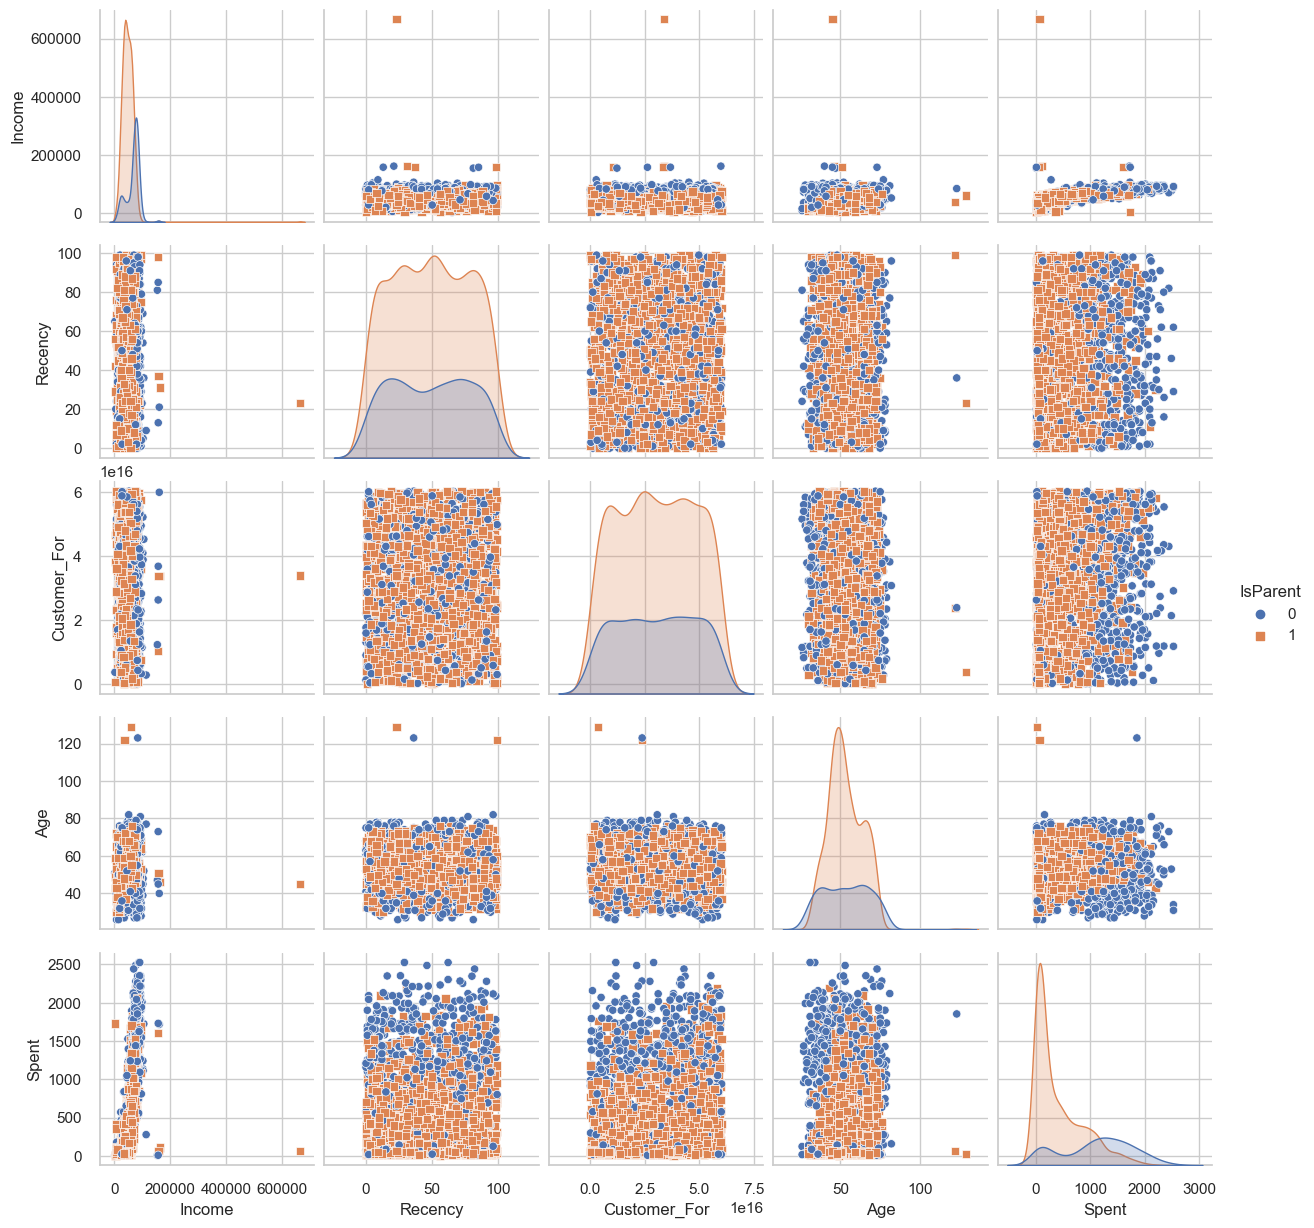

In [197]:
# Create pair plot graphs that display relationship among Income, Recemcy. Customer_For, Age, Spent features  
sns.set(style='whitegrid', context='notebook')
cols = ["Income", "Recency", "Customer_For", "Age", "Spent", "IsParent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df3[cols], hue= "IsParent", markers=["o","s"])
plt.show()

In [198]:
# Remove outliers for Income and Age features 
cond = df3.loc[:,"Income"] < 600000
df3 = df3.loc[cond]

cond2 = df3.loc[:,"Age"] < 110
df3 = df3.loc[cond2]
print("Total length of dataset after removing outliers:", len(df3))

Total length of dataset after removing outliers: 2212


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

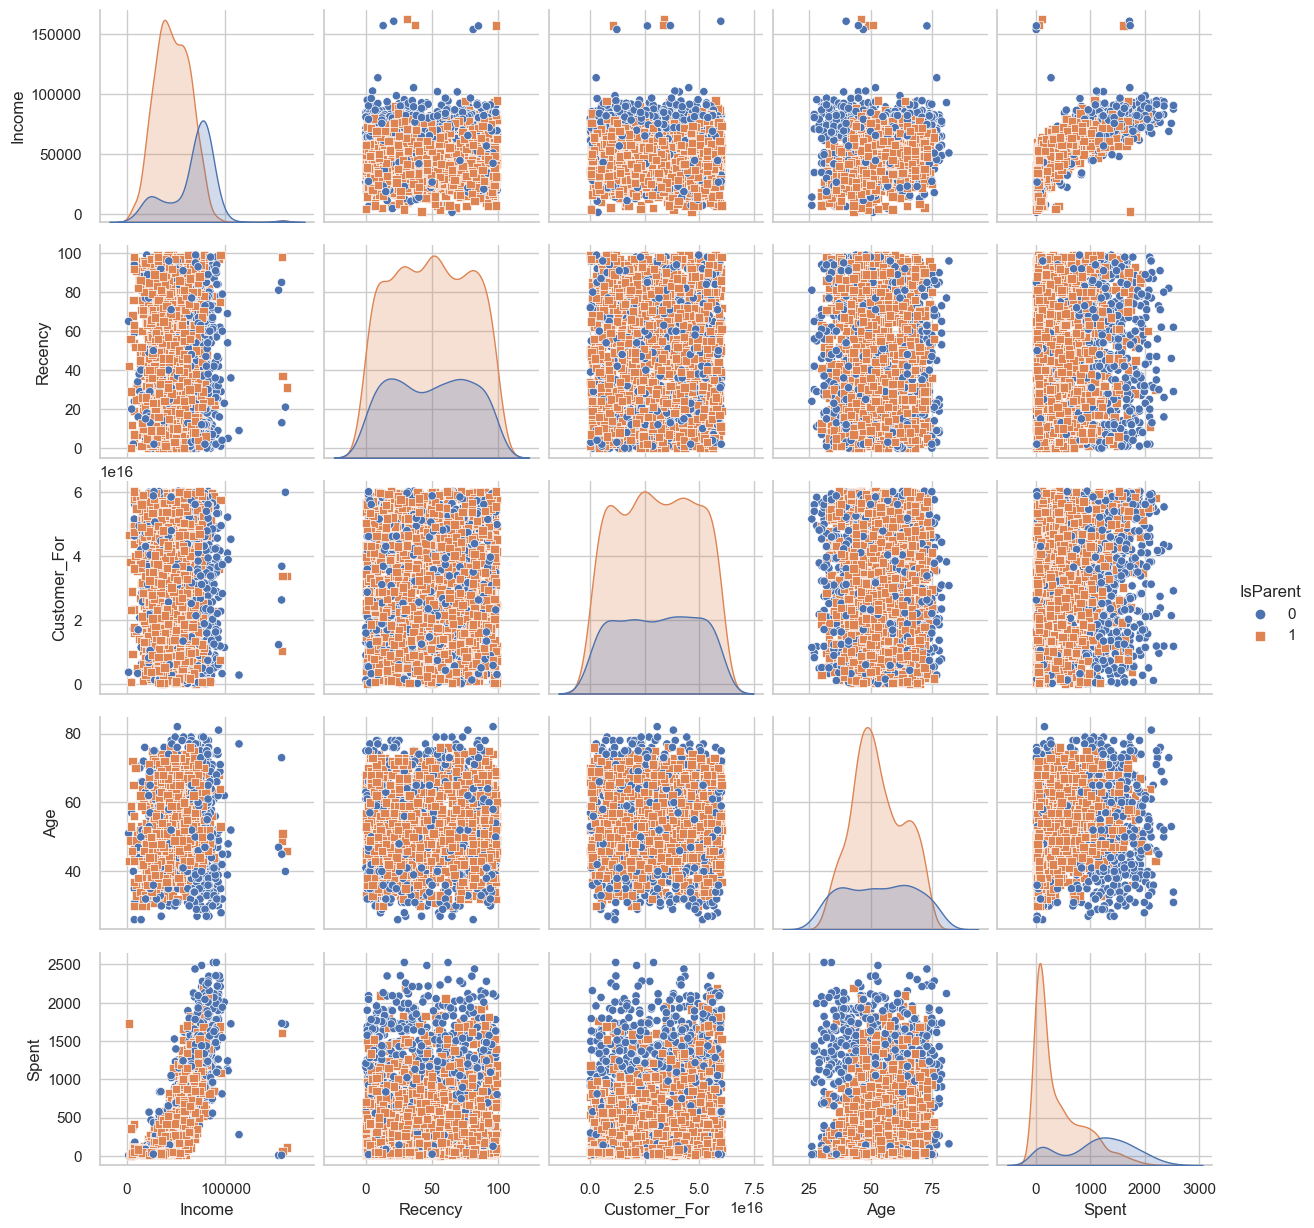

In [199]:
# Display pair plot graphs after removing outliers
sns.set(style='whitegrid', context='notebook')
cols = ["Income", "Recency", "Customer_For", "Age", "Spent", "IsParent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df3[cols], hue= "IsParent", markers=["o","s"])
plt.show()

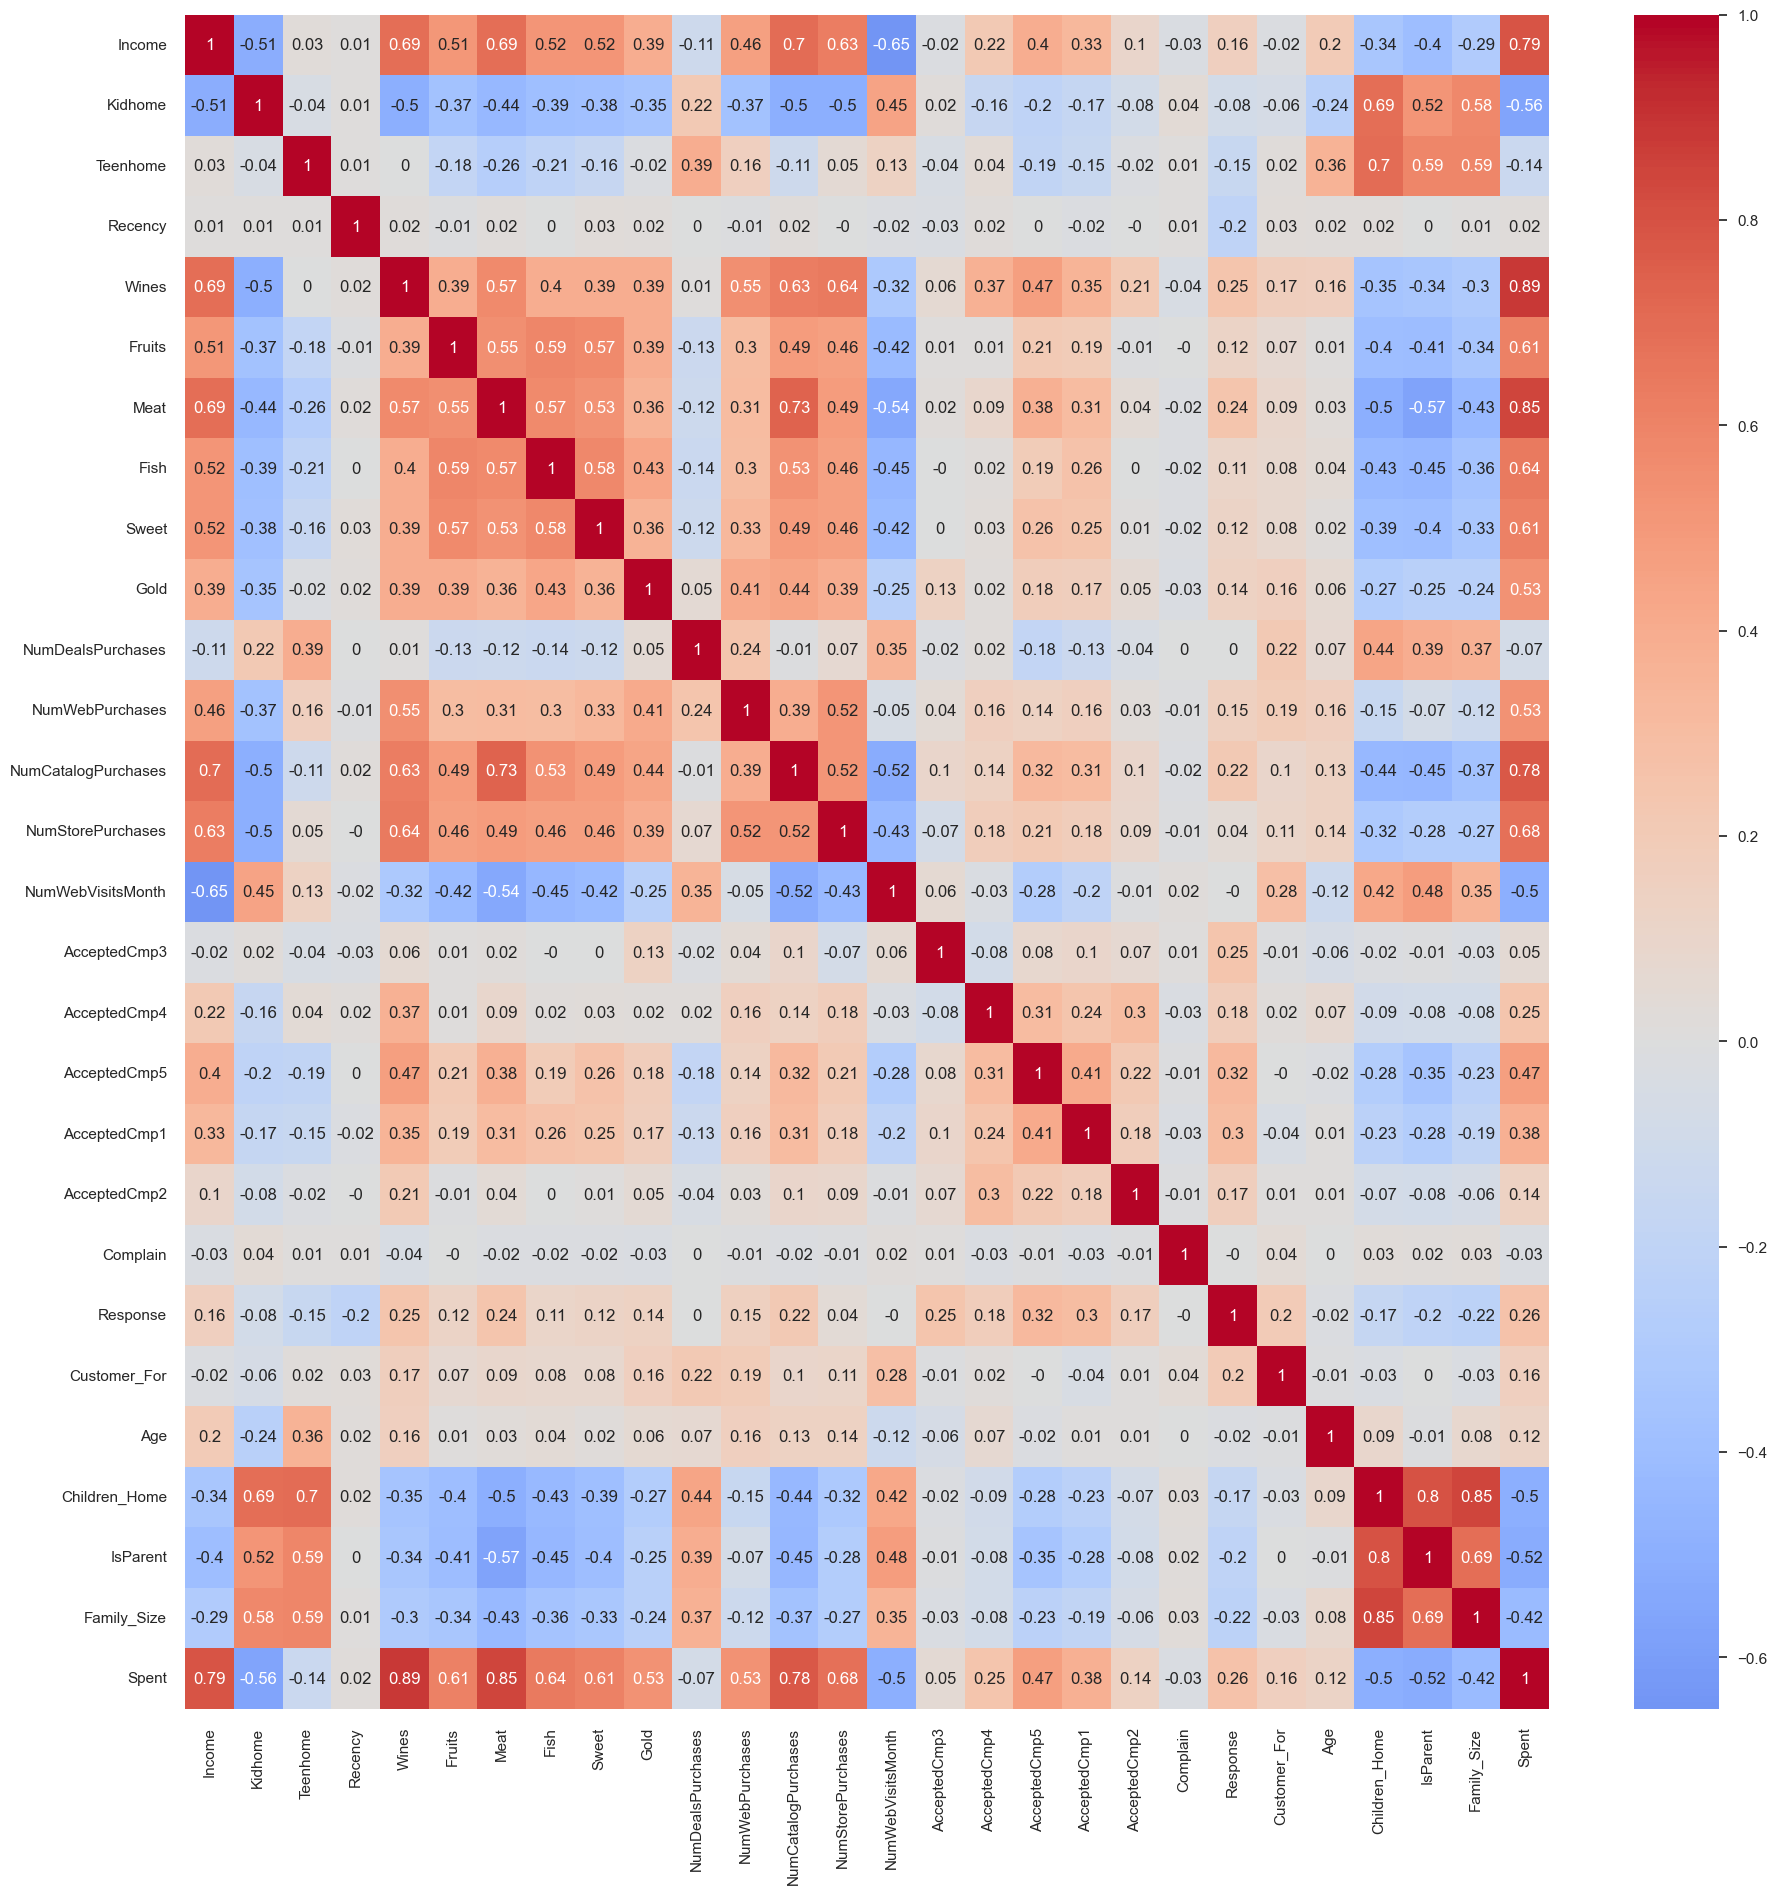

In [200]:
# Create the correlation matrix 
matrix = df3.select_dtypes(include=np.number).corr().round(2)
plt.figure(figsize=(22,22))
sns.heatmap(matrix, annot=True, center=0, cmap="coolwarm")
plt.show()

AcceptedCmp1    6.428571
AcceptedCmp2    1.339286
AcceptedCmp3    7.276786
AcceptedCmp4    7.455357
AcceptedCmp5    7.276786
dtype: float64


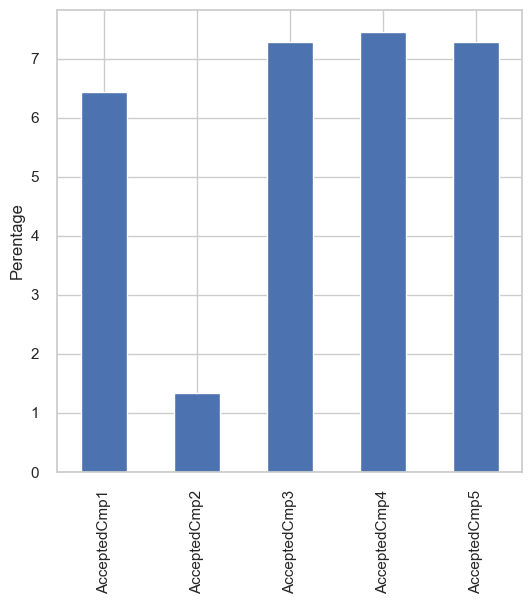

In [201]:
Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100
print(success_campaign)
# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

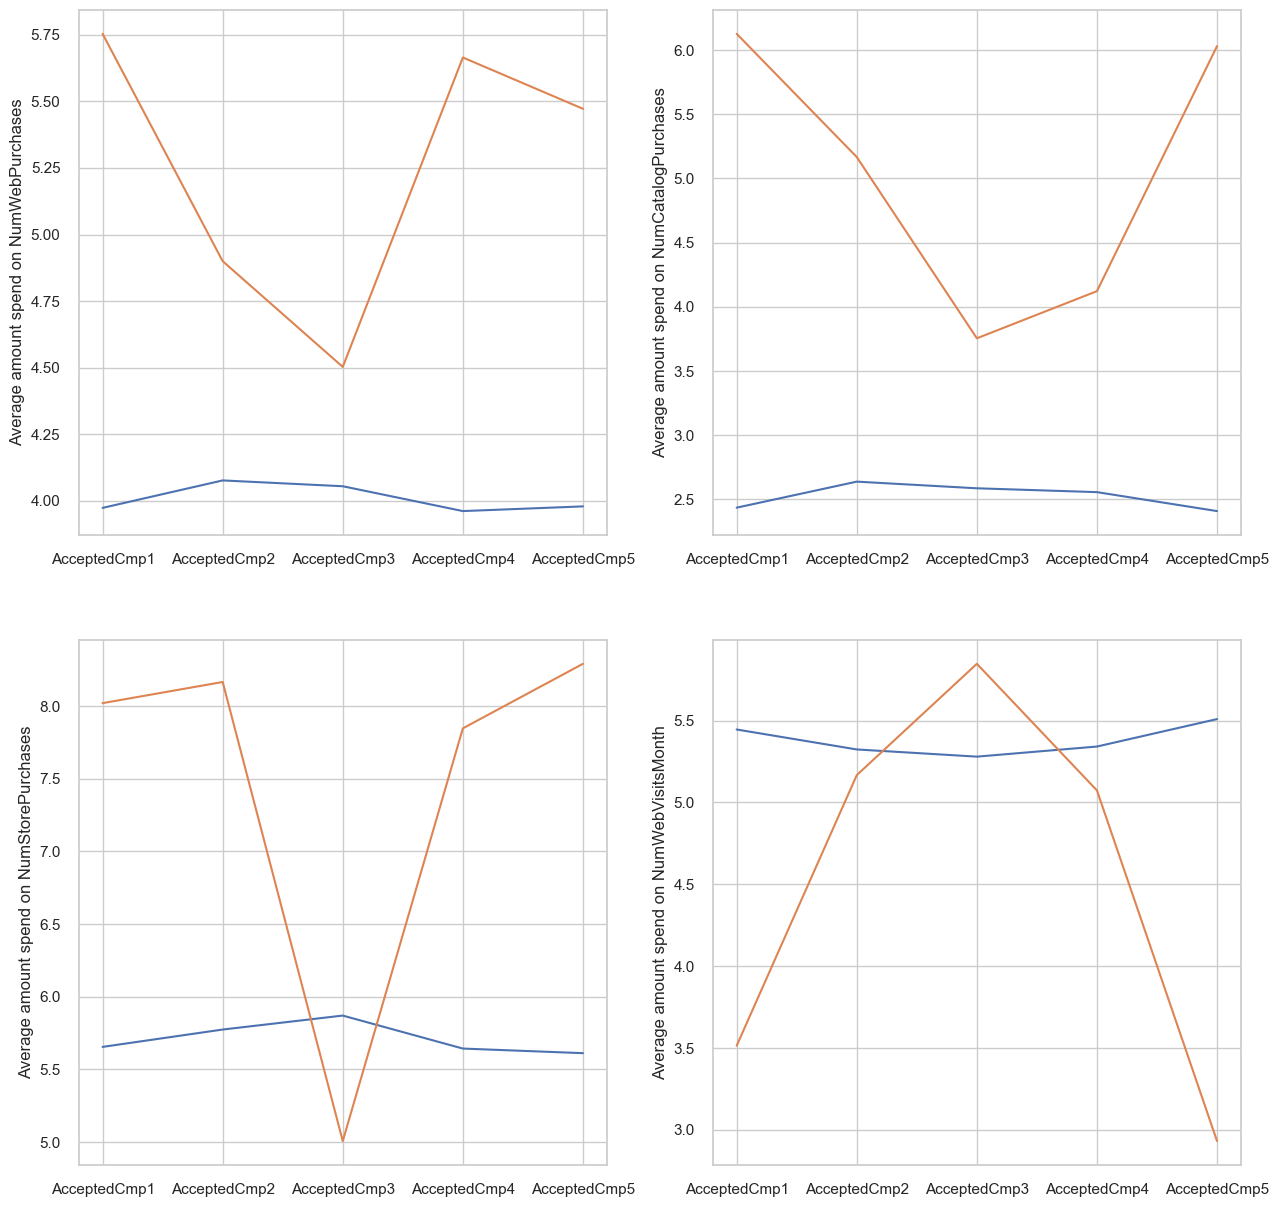

In [202]:
col_list = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']
num_col_list = df3.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,15))
for i in range(len(col_list)):
    p1=pd.DataFrame(df3.groupby(['AcceptedCmp1'])[num_col_list].mean()[col_list[i]]).T
    p2=pd.DataFrame(df3.groupby(['AcceptedCmp2'])[num_col_list].mean()[col_list[i]]).T
    p3=pd.DataFrame(df3.groupby(['AcceptedCmp3'])[num_col_list].mean()[col_list[i]]).T
    p4=pd.DataFrame(df3.groupby(['AcceptedCmp4'])[num_col_list].mean()[col_list[i]]).T
    p5=pd.DataFrame(df3.groupby(['AcceptedCmp5'])[num_col_list].mean()[col_list[i]]).T
    plt.subplot(2,2 ,i+1)
    con = pd.concat([p1,p2,p3,p4,p5],axis=0).set_index([Camp_cols])
    plt.plot(con)
    plt.ylabel('Average amount spend on' + ' ' + col_list[i])

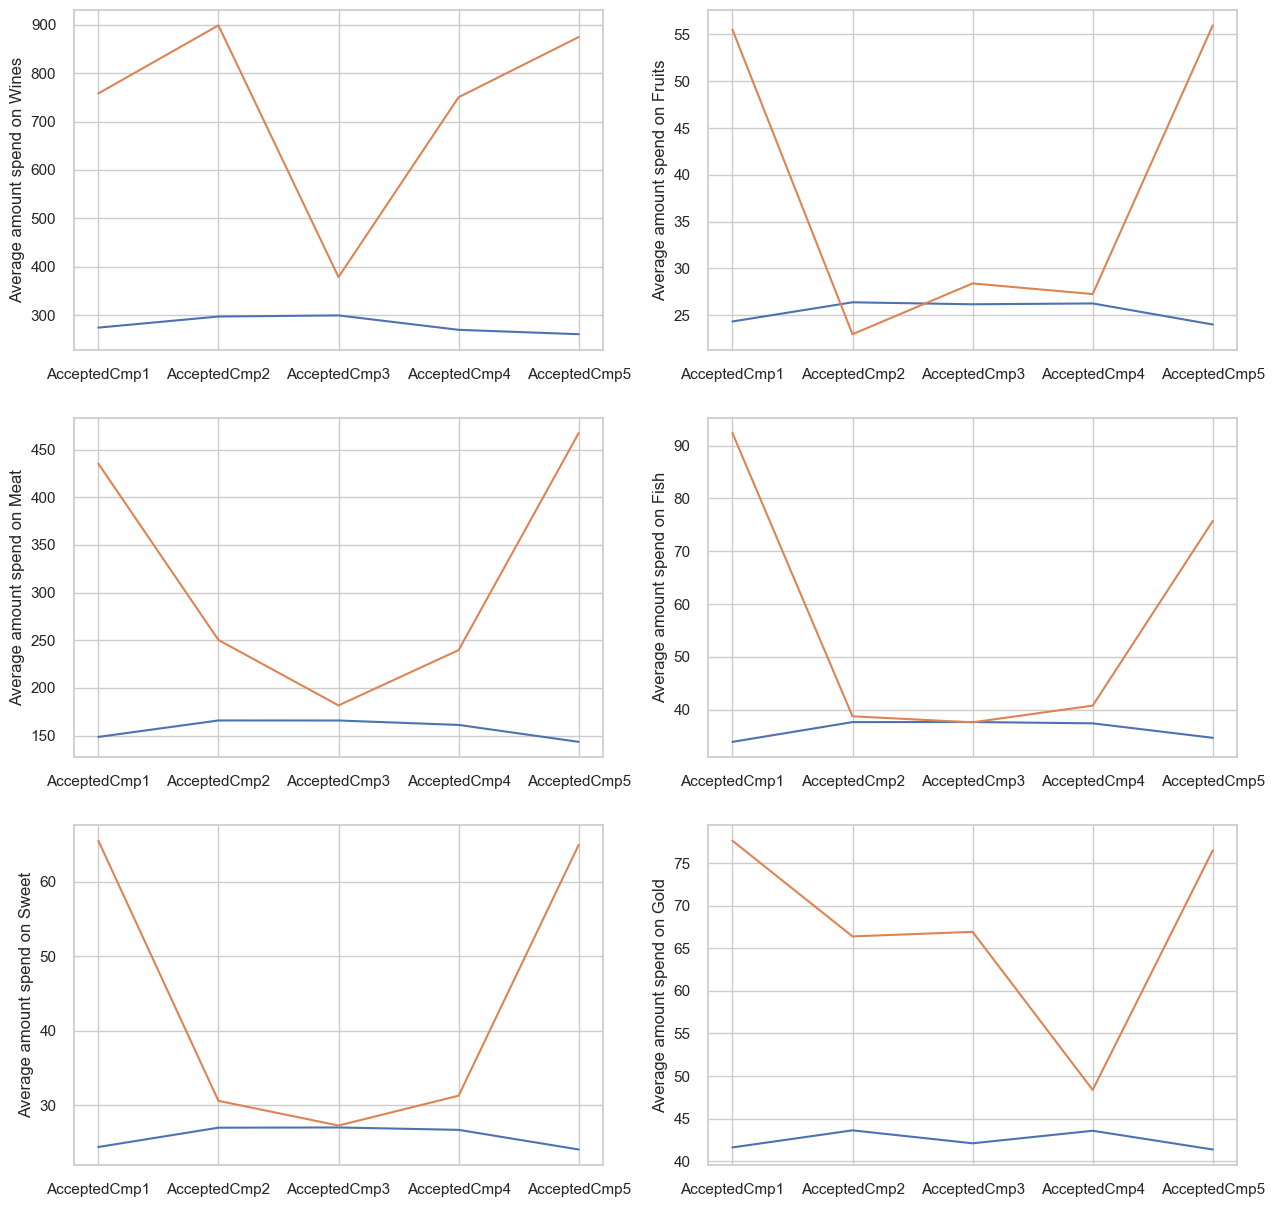

In [203]:
col_list = ["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]
num_col_list = df3.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,15))
for i in range(len(col_list)):
    p1=pd.DataFrame(df3.groupby(['AcceptedCmp1'])[num_col_list].mean()[col_list[i]]).T
    p2=pd.DataFrame(df3.groupby(['AcceptedCmp2'])[num_col_list].mean()[col_list[i]]).T
    p3=pd.DataFrame(df3.groupby(['AcceptedCmp3'])[num_col_list].mean()[col_list[i]]).T
    p4=pd.DataFrame(df3.groupby(['AcceptedCmp4'])[num_col_list].mean()[col_list[i]]).T
    p5=pd.DataFrame(df3.groupby(['AcceptedCmp5'])[num_col_list].mean()[col_list[i]]).T
    plt.subplot(3,2 ,i+1)
    con = pd.concat([p1,p2,p3,p4,p5],axis=0).set_index([Camp_cols])
    plt.plot(con)
    plt.ylabel('Average amount spend on' + ' ' + col_list[i])
 

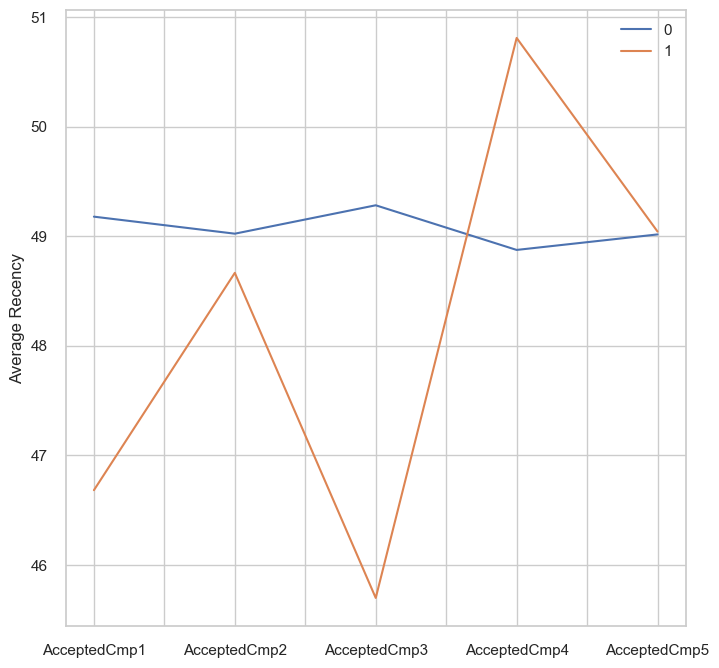

In [204]:
#Recency
num_col_list = df3.select_dtypes(include=np.number).columns.tolist()
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df3.groupby(['AcceptedCmp1'])[num_col_list].mean()[columns_name]).T
    dp2=pd.DataFrame(df3.groupby(['AcceptedCmp2'])[num_col_list].mean()[columns_name]).T
    dp3=pd.DataFrame(df3.groupby(['AcceptedCmp3'])[num_col_list].mean()[columns_name]).T
    dp4=pd.DataFrame(df3.groupby(['AcceptedCmp4'])[num_col_list].mean()[columns_name]).T
    dp5=pd.DataFrame(df3.groupby(['AcceptedCmp5'])[num_col_list].mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

Purchases_per_campaign('Recency')



In [205]:
# Find the categorical variables in orginal data (df3) and change it to the numerical variable by using LabelEncoder.
from sklearn.preprocessing import LabelEncoder
s = (df3.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    df3[i]=df3[[i]].apply(LE.fit_transform)
print("All features are now numerical")


Categorical variables: ['Education', 'Live_With']
All features are now numerical


In [206]:
# The data which we changed the categorical variable to numerical.
df3

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweet  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0      172     88  ...             0         0         1  57283200000000000   
1        2      1  ...             0         0         0   9763200000000000   
2      111     21  ...             0         0         0  26956800000000000   
3       10      3  ...             0         0         0  12009600000000000   
4       46     27  ...             0         0         0  13910400000000000   
...    ...    ...  ...           ...       ...       ...                ...   
2235    42    118  ...             0         0         0  32918400000000000   
2236     0      0  ...             0         0         0   1641600000000000   
2237    32     12  ...             0         0         0  13392000000000000   
2238    80     30  ...             0         0         0  13478400000000000   
2239     2      1  ...             0         0         1  53740800000000000   

      Age  Live_With  Children_Home  IsParent  Family_Size  Spent  
0      65          0              0         0            1   1617  
1      68          0              2         1            3     27  
2      57          1              0         0            2    776  
3      38          1              1         1            3     53  
4      41          1              1         1            3    422  
...   ...        ...            ...       ...          ...    ...  
2235   55          1              1         1            3   1341  
2236   76          1              3         1            5    444  
2237   41          0              0         0            1   1241  
2238   66          1              1         1            3    843  
2239   68          1              2         1            4    172  

[2212 rows x 30 columns]

In [207]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

pca_df = df3.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
pca_df = pca_df.drop(cols_del, axis=1)
attributes = list(pca_df)
x = pca_df.loc[:, attributes].values
x1 = StandardScaler().fit_transform(x)
x1_df = pd.DataFrame(x1,columns= pca_df.columns )
x1_df.head()


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish     Sweet  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age  Live_With  Children_Home  \
0           0.692181      1.527721  1.018352  -1.349603      -1.264598   
1          -0.132545     -1.189011  1.274785  -1.349603       1.404572   
2          -0.544908     -0.206048  0.334530   0.740959      -1.264598   
3           0.279818     -1.060584 -1.289547   0.740959       0.069987   
4          -0.132545     -0.951915 -1.033114   0.740959       0.069987   

   IsParent  Family_Size     Spent  
0 -1.581139    -1.758359  1.676245  
1  0.632456     0.449070 -0.963297  
2 -1.581139    -0.654644  0.280110  
3  0.632456     0.449070 -0.920135  
4  0.632456     0.449070 -0.307562  

[5 rows x 23 columns]

Text(0.5, 1.0, 'Scree plot')

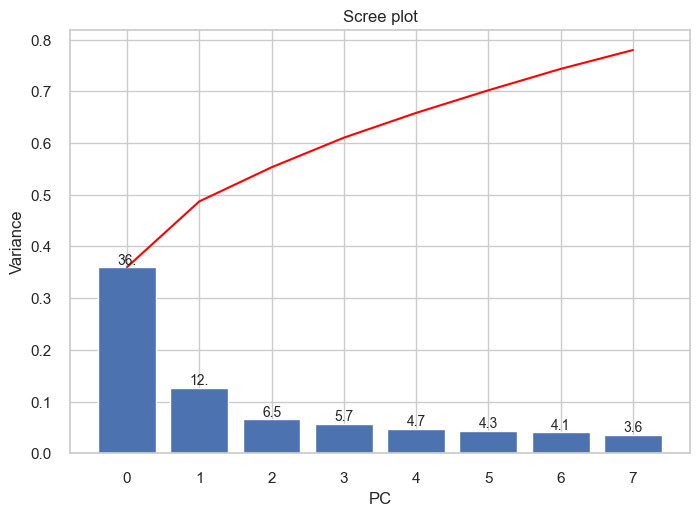

In [208]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x1)
num_components = len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_ 
    
ax = plt.subplot()
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cumvals, color = 'red') 

for i in range(num_components): 
    ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), 
    va = "bottom", ha = "center", fontsize = 10)
 
ax.set_xlabel("PC")
ax.set_ylabel("Variance")
plt.title('Scree plot')


In [209]:
principalComponents   = principalComponents[:,0:3]
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'Principal_Component_1', 'Principal_Component_2','Principal_Component_3'])

principalDf.describe().T

count          mean       std       min       25%  \
Principal_Component_1  2212.0  2.569775e-17  2.878602 -5.978124 -2.539470   
Principal_Component_2  2212.0 -2.569775e-17  1.709469 -4.194757 -1.323930   
Principal_Component_3  2212.0  1.726567e-17  1.231687 -3.624947 -0.853648   

                            50%       75%       max  
Principal_Component_1 -0.781595  2.386380  7.452915  
Principal_Component_2 -0.173721  1.234851  6.168189  
Principal_Component_3 -0.050793  0.864257  6.750069

In [210]:
principalDf

Principal_Component_1  Principal_Component_2  Principal_Component_3
0                  4.986336              -0.161517               2.445629
1                 -2.874168               0.022697              -1.530776
2                  2.615763              -0.731422              -0.264413
3                 -2.654568              -1.455878              -0.398364
4                 -0.656015               0.177866              -0.141475
...                     ...                    ...                    ...
2207               2.322945               2.437469               0.493542
2208              -3.100999               4.014064              -1.416068
2209               2.666497              -1.893682               0.558614
2210               1.487349               1.651773              -1.760312
2211              -2.733469               1.688077              -0.212043

[2212 rows x 3 columns]

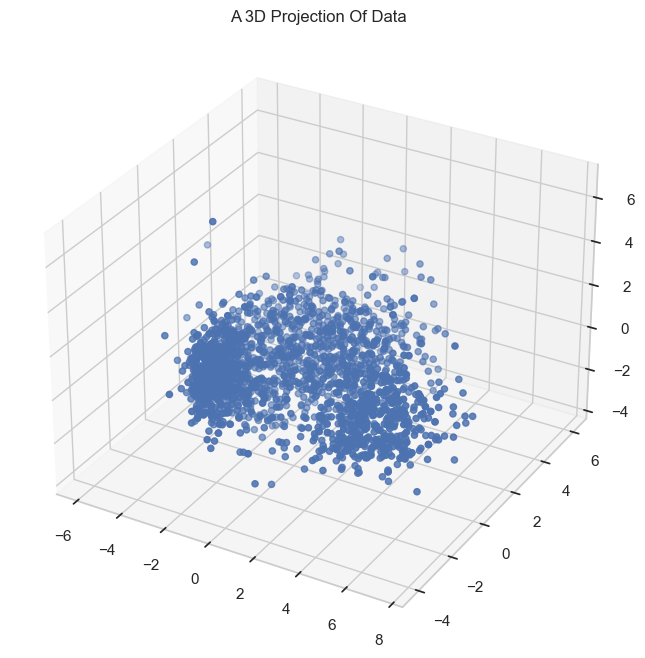

In [211]:
#A 3D Projection Of Data In The Reduced Dimension
x =principalDf["Principal_Component_1"]
y =principalDf["Principal_Component_2"]
z =principalDf["Principal_Component_3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data")
plt.show()



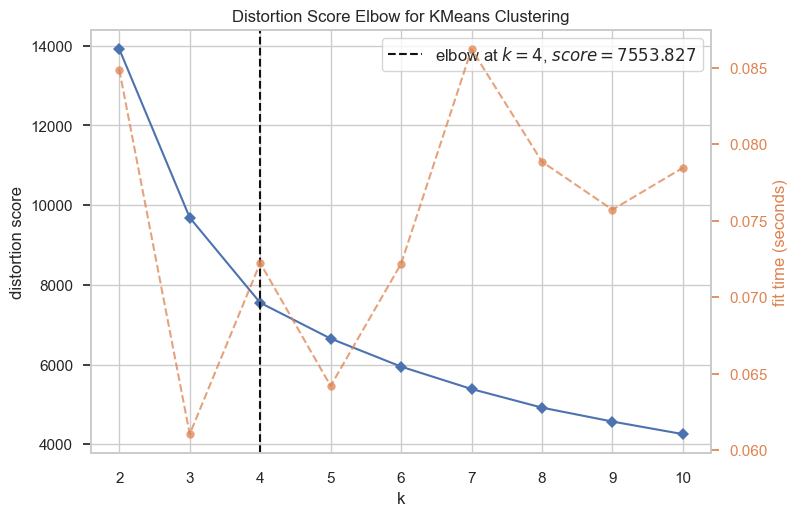

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [212]:
# Using the Elbow method, we can find the optimal number of cluster, in this case is 4. 
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_Method = KElbowVisualizer(KMeans(), k=10)
Elbow_Method.fit(principalDf)
Elbow_Method.show()

In [213]:
# We will perform the K means cluster to find the customer segmenatation.
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(principalDf)
clusters = kmeans.fit_predict(principalDf)
principalDf["Cluster"] = clusters
df3["Cluster"] = clusters


In [214]:
principalDf

Principal_Component_1  Principal_Component_2  Principal_Component_3  \
0                  4.986336              -0.161517               2.445629   
1                 -2.874168               0.022697              -1.530776   
2                  2.615763              -0.731422              -0.264413   
3                 -2.654568              -1.455878              -0.398364   
4                 -0.656015               0.177866              -0.141475   
...                     ...                    ...                    ...   
2207               2.322945               2.437469               0.493542   
2208              -3.100999               4.014064              -1.416068   
2209               2.666497              -1.893682               0.558614   
2210               1.487349               1.651773              -1.760312   
2211              -2.733469               1.688077              -0.212043   

      Cluster  
0           1  
1           3  
2           1  
3           0  
4           3  
...       ...  
2207        2  
2208        3  
2209        1  
2210        2  
2211        3  

[2212 rows x 4 columns]

In [215]:
df3

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweet  ...  Complain  Response       Customer_For  Age  Live_With  \
0      172     88  ...         0         1  57283200000000000   65          0   
1        2      1  ...         0         0   9763200000000000   68          0   
2      111     21  ...         0         0  26956800000000000   57          1   
3       10      3  ...         0         0  12009600000000000   38          1   
4       46     27  ...         0         0  13910400000000000   41          1   
...    ...    ...  ...       ...       ...                ...  ...        ...   
2235    42    118  ...         0         0  32918400000000000   55          1   
2236     0      0  ...         0         0   1641600000000000   76          1   
2237    32     12  ...         0         0  13392000000000000   41          0   
2238    80     30  ...         0         0  13478400000000000   66          1   
2239     2      1  ...         0         1  53740800000000000   68          1   

      Children_Home  IsParent  Family_Size  Spent  Cluster  
0                 0         0            1   1617        1  
1                 2         1            3     27        3  
2                 0         0            2    776        1  
3                 1         1            3     53        0  
4                 1         1            3    422        3  
...             ...       ...          ...    ...      ...  
2235              1         1            3   1341        2  
2236              3         1            5    444        3  
2237              0         0            1   1241        1  
2238              1         1            3    843        2  
2239              2         1            4    172        3  

[2212 rows x 31 columns]

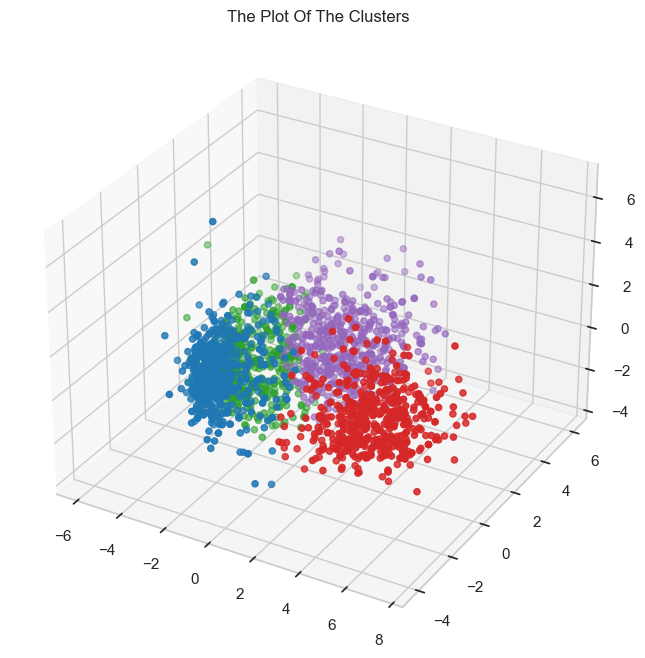

In [216]:
# Coloring each dot depends on the cluster. 
from matplotlib import colors
cmap = colors.ListedColormap(["#1f77b4","#d62728","#9467bd","#2ca02c"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=20, c=principalDf["Cluster"], marker='o', cmap =cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

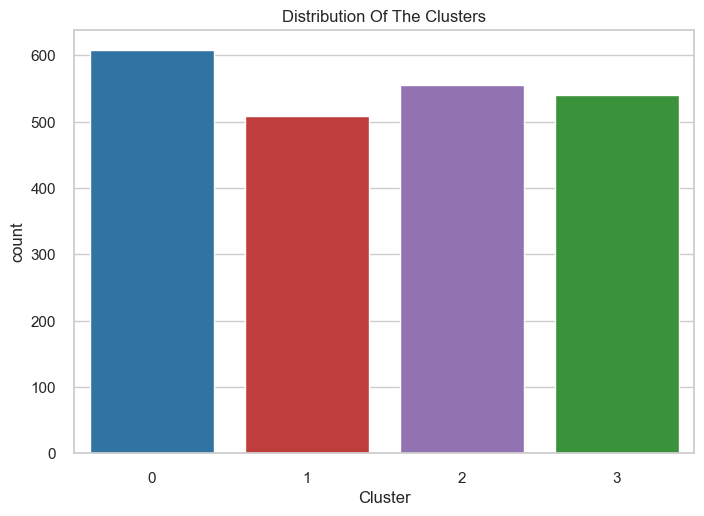

In [217]:
# Find the distribution of the cluster.
col = ["#1f77b4","#d62728","#9467bd","#2ca02c"]
pl = sns.countplot(x=df3["Cluster"], palette= col)
pl.set_title("Distribution Of The Clusters")
plt.show()

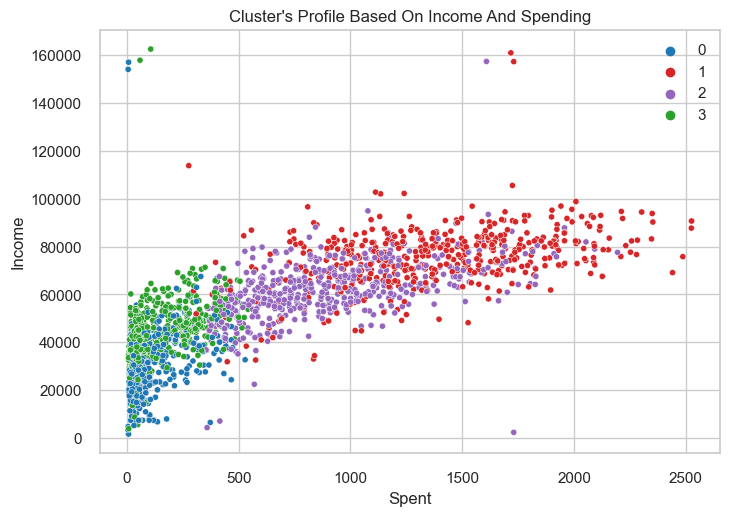

In [218]:
#The clusters seem to be fairly distributed.
pl = sns.scatterplot(data = df3,x=df3["Spent"], y=df3["Income"],hue=df3["Cluster"], palette= col,s=20)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [219]:
print("Income mean:", df3['Income'].mean())
print("Income mean by cluster:")
print("Group 0:",df3[df3["Cluster"] == 0].Income.mean())
print("Group 1:",df3[df3["Cluster"] == 1].Income.mean())
print("Group 2:",df3[df3["Cluster"] == 2].Income.mean())
print("Group 3:",df3[df3["Cluster"] == 3].Income.mean())

print("\nSpent mean:",df3['Spent'].mean())
print("Spent mean by cluster:")
print("Group 0:",df3[df3["Cluster"] == 0].Spent.mean())
print("Group 1:",df3[df3["Cluster"] == 1].Spent.mean())
print("Group 2:",df3[df3["Cluster"] == 2].Spent.mean())
print("Group 3:",df3[df3["Cluster"] == 3].Spent.mean())

Income mean: 51958.81057866185
Income mean by cluster:
Group 0: 30437.876644736843
Group 1: 75686.45078740157
Group 2: 62009.28468468469
Group 3: 43554.1404805915

Spent mean: 607.2680831826401
Spent mean by cluster:
Group 0: 101.92269736842105
Group 1: 1372.3799212598426
Group 2: 902.2738738738739
Group 3: 154.11645101663586


Income vs spending plot shows the clusters pattern

- group 0: very low spending & very low income 
- group 1: very high spending & very high income
- group 2: high spending & high income
- group 3: low spending & low income

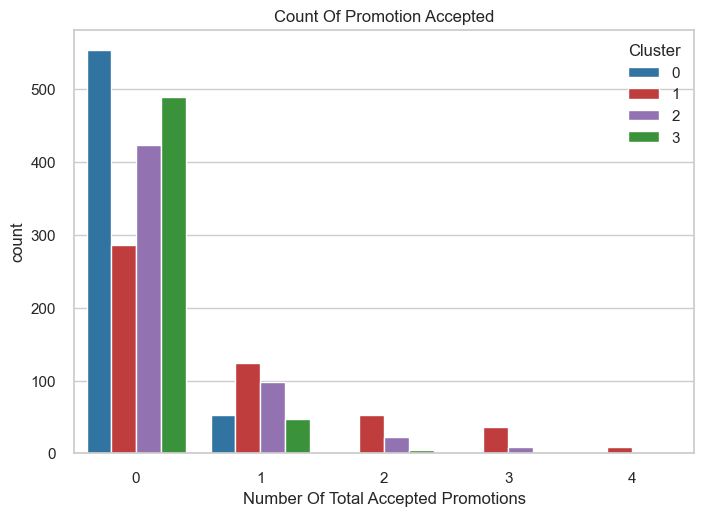

In [220]:
#We can explore what each cluster is spending on for the targeted marketing strategies.
#Creating a feature to get a sum of accepted promotions 
df3["Total_Promos"] = df3["AcceptedCmp1"]+ df3["AcceptedCmp2"]+ df3["AcceptedCmp3"]+ df3["AcceptedCmp4"]+ df3["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df3["Total_Promos"],hue=df3["Cluster"], palette= col)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

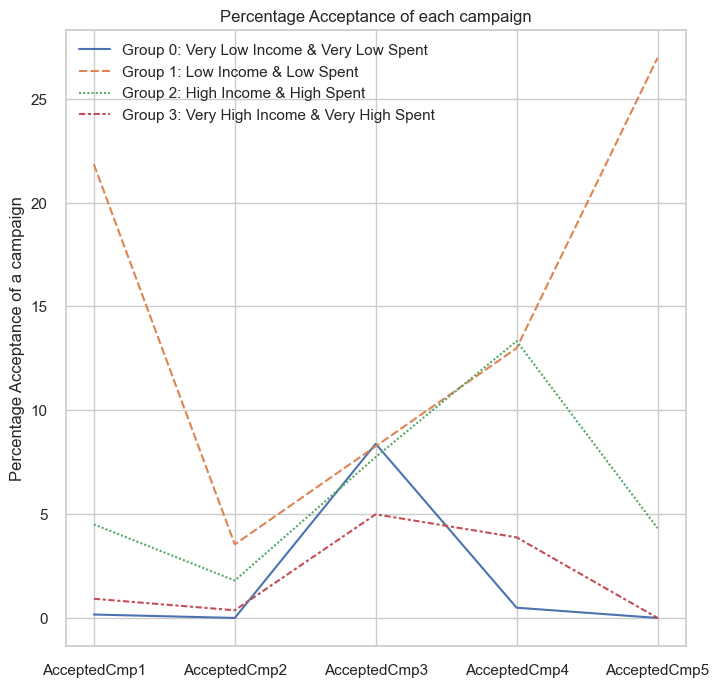

In [221]:
# making dataframes of customers having income <52k and >52K
df_1=df3[df3.Cluster==0]
df_2=df3[df3.Cluster==1]
df_3=df3[df3.Cluster==2]
df_4=df3[df3.Cluster==3]


Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

#Calculating success rate of each campaing for both segments 
success_campaign1=pd.DataFrame((df_1[Camp_cols].sum()/df_1.shape[0])*100, columns=['Group 0: Very Low Income & Very Low Spent'])

success_campaign2=pd.DataFrame((df_2[Camp_cols].sum()/df_2.shape[0])*100, columns=['Group 1: Low Income & Low Spent'])

success_campaign3=pd.DataFrame((df_3[Camp_cols].sum()/df_3.shape[0])*100, columns=['Group 2: High Income & High Spent'])

success_campaign4=pd.DataFrame((df_4[Camp_cols].sum()/df_4.shape[0])*100, columns=['Group 3: Very High Income & Very High Spent'])


new_df=pd.concat([success_campaign1, success_campaign2,success_campaign3,success_campaign4], axis=1)

# plot
plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

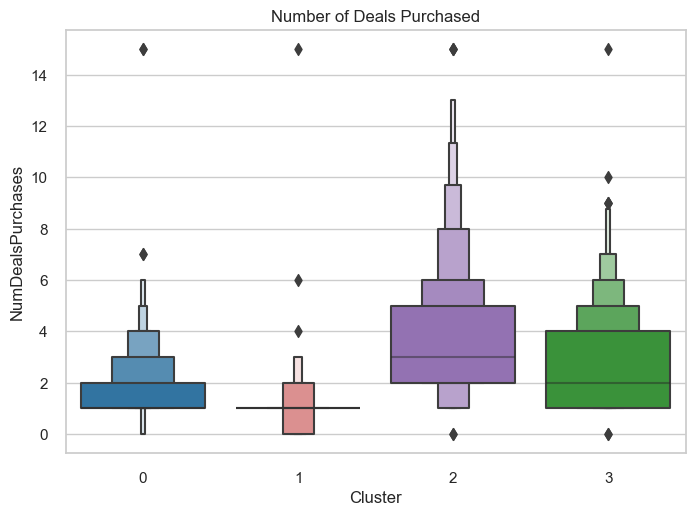

In [222]:
plt.figure()
pl=sns.boxenplot(y=df3["NumDealsPurchases"],x=df3["Cluster"], palette= col)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

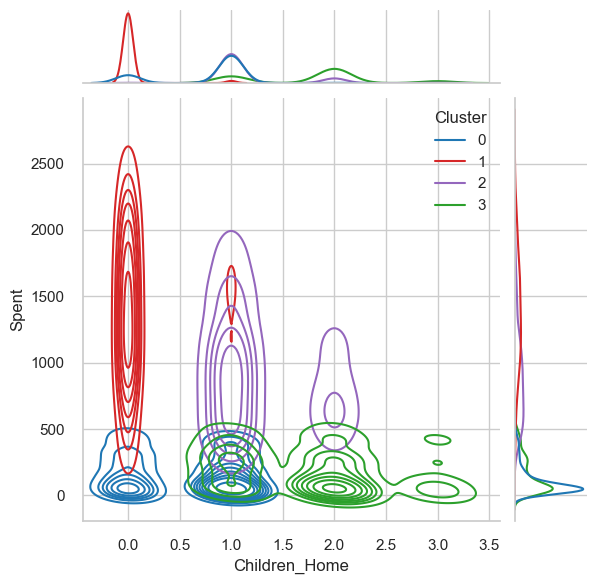

<Figure size 800x550 with 0 Axes>

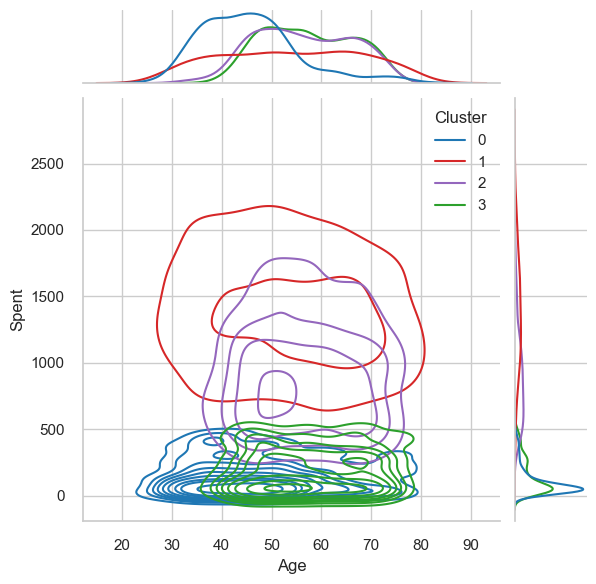

<Figure size 800x550 with 0 Axes>

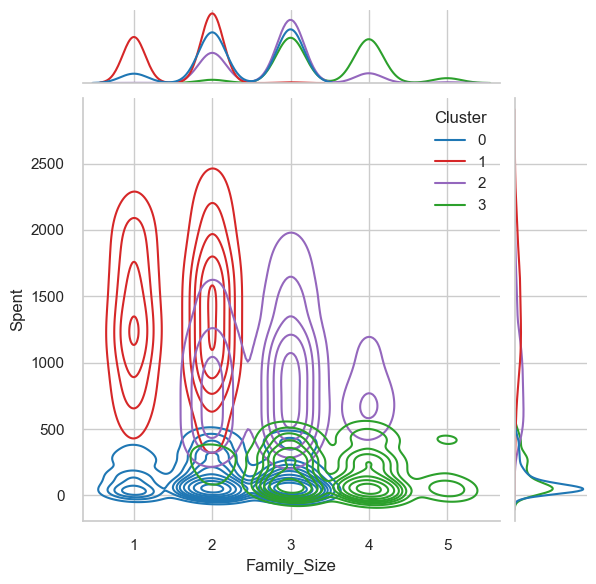

c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

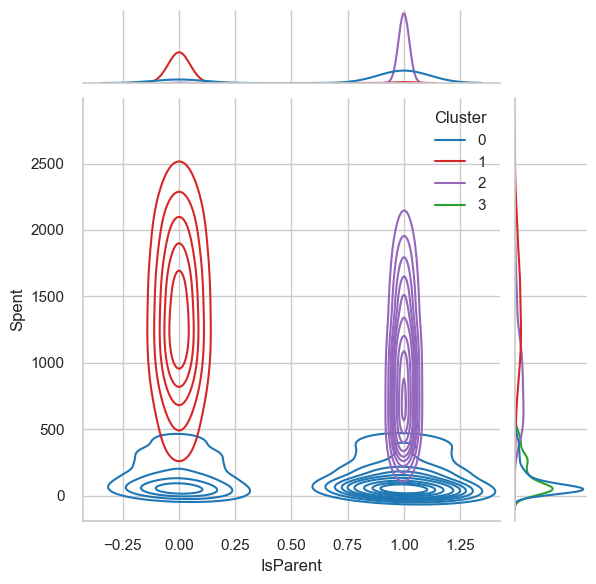

<Figure size 800x550 with 0 Axes>

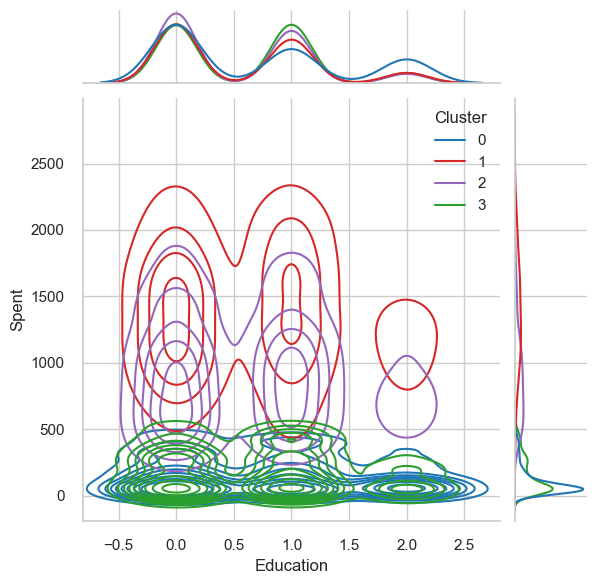

<Figure size 800x550 with 0 Axes>

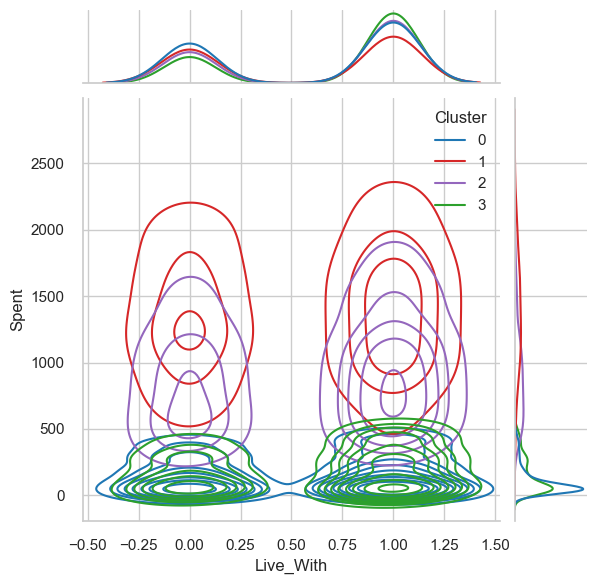

In [223]:
Personal = ["Children_Home", "Age", "Family_Size", "IsParent", "Education","Live_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df3[i], y=df3["Spent"], hue =df3["Cluster"], kind="kde", palette=col)
    plt.show()